In [74]:
import requests
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
import dotenv
dotenv.load_dotenv('../.env')

True

In [2]:
'''
curl -i -H  \
  "https://api.nftbank.ai/v3/estimated-price/ethereum/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/1?
  start_date=2022-05-20&end_date=2022-06-07"
  '''

'\ncurl -i -H    "https://api.nftbank.ai/v3/estimated-price/ethereum/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/1?\n  start_date=2022-05-20&end_date=2022-06-07"\n  '

In [3]:
NFTBANK_URL='https://api.nftbank.ai/v3/estimated-price/ethereum/{}/1'

In [4]:
nft_address = '0xdbf40a5b96c69327ae871f24ad26b16afc40bb0a'
r = requests.get(NFTBANK_URL.format(nft_address), headers={"x-api-key": os.environ['NFTBANK_API_KEY']})

In [5]:
r.text

'{"data":[],"message":"OK","statusCode":20000}\n'

In [6]:
os.environ['NFTBANK_API_KEY']

'73dd214b24cdcd200af56c342705d4cd'

In [101]:
r = requests.get("https://api.nftbank.ai/v3/estimated-price/ethereum/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/1",
                 headers={"Content-Type":"application/json","x-api-key": os.environ['NFTBANK_API_KEY']})
estimated_prices = pd.DataFrame(r.json()['data'])

In [102]:
estimated_prices

,estimatedPriceEth,processedAt
0,6.611798461584999842,2021-06-20T00:00:00+00:00
1,7.921275819291296649,2021-06-21T00:00:00+00:00
2,8.970609863503627324,2021-06-22T00:00:00+00:00
3,9.297171682470940723,2021-06-23T00:00:00+00:00
4,9.828438635754995545,2021-06-24T00:00:00+00:00
...,...,...
428,161.983155772359566527,2022-08-22T00:00:00+00:00
429,150.283981363263904996,2022-08-23T00:00:00+00:00
430,161.099307011718053673,2022-08-24T00:00:00+00:00
431,145.419172745466170227,2022-08-25T00:00:00+00:00


In [103]:
r = requests.get("https://api.nftbank.ai/v3/floor-price/ethereum/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D",
                 headers={"Content-Type":"application/json","x-api-key": os.environ['NFTBANK_API_KEY']})
floor_prices = pd.DataFrame(r.json()['data'])

In [104]:
floor_prices.tail()

,floorPriceEth,processedAt
311,69.879999999999995453,2022-08-22T00:00:00+00:00
312,67.890000000000000568,2022-08-23T00:00:00+00:00
313,66.989999999999994884,2022-08-24T00:00:00+00:00
314,74.489999999999994884,2022-08-25T00:00:00+00:00
315,76.489999999999994884,2022-08-26T00:00:00+00:00


In [19]:
cg = CoinGeckoAPI()

In [22]:
api_resp = cg.get_coin_history_by_id('bitcoin', date='30-12-2017', localization=False)
price_in_aud = api_resp['market_data']['current_price']['aud']
print(price_in_aud)

17446.3215245937


In [24]:
api_resp = cg.get_coin_market_chart_by_id('ethereum', vs_currency='usd', days=365, interval='daily')

In [50]:
prices = pd.DataFrame(api_resp['prices'],columns=['datetime','price_usd'])
prices['datetime'] = prices['datetime'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
prices.set_index('datetime',inplace=True)
prices.head()

,price_usd
datetime,
2021-08-27 02:00:00,3122.971797
2021-08-28 02:00:00,3267.539435
2021-08-29 02:00:00,3245.430222
2021-08-30 02:00:00,3233.383152
2021-08-31 02:00:00,3232.733863


In [29]:
datetime.datetime.fromtimestamp(1661493025000/1000)

datetime.datetime(2022, 8, 26, 7, 50, 25)

In [45]:
# get price closest to '2021-11-17T00:00:00+00:00'
datetime.datetime.strptime('2021-11-17T00:00:00+00:00','%Y')

ValueError: unconverted data remains: -11-17T00:00:00+00:00

In [35]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [54]:
prices.iloc[prices.index.get_loc(pd.Timestamp('2021-08-28T00:00:00+00:00').to_pydatetime(),method='nearest')]

C:\Users\gabri\AppData\Local\Temp\ipykernel_14800\2610349290.py:1: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  prices.iloc[prices.index.get_loc(pd.Timestamp('2021-08-28T00:00:00+00:00').to_pydatetime(),method='nearest')]
C:\Users\gabri\AppData\Local\Temp\ipykernel_14800\2610349290.py:1: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  prices.iloc[prices.index.get_loc(pd.Timestamp('2021-08-28T00:00:00+00:00').to_pydatetime(),method='nearest')]


price_usd    3267.539435
Name: 2021-08-28 02:00:00, dtype: float64

In [52]:
prices

,price_usd
datetime,
2021-08-27 02:00:00,3122.971797
2021-08-28 02:00:00,3267.539435
2021-08-29 02:00:00,3245.430222
2021-08-30 02:00:00,3233.383152
2021-08-31 02:00:00,3232.733863
...,...
2022-08-23 02:00:00,1622.307035
2022-08-24 02:00:00,1665.791907
2022-08-25 02:00:00,1657.793642


In [55]:
### get price in eth, plot floor_price and estimate_price

In [79]:
n = 3
df = pd.concat([pd.DataFrame(dict(dates=pd.date_range(start=datetime.datetime.today(),periods=n), 
                       floor_price=np.linspace(1,10,n),
                      estimated_price=np.linspace(4,20,n), cat=['a']*n)),
        pd.DataFrame(dict(dates=pd.date_range(start=datetime.datetime.today(),periods=n), 
                       floor_price=np.linspace(10,20,n),
                      estimated_price=np.linspace(44,220,n), cat=['b']*n))])

df

,dates,floor_price,estimated_price,cat
0,2022-08-26 16:44:56.379999,1.0,4.0,a
1,2022-08-27 16:44:56.379999,5.5,12.0,a
2,2022-08-28 16:44:56.379999,10.0,20.0,a
0,2022-08-26 16:44:56.381953,10.0,44.0,b
1,2022-08-27 16:44:56.381953,15.0,132.0,b
2,2022-08-28 16:44:56.381953,20.0,220.0,b


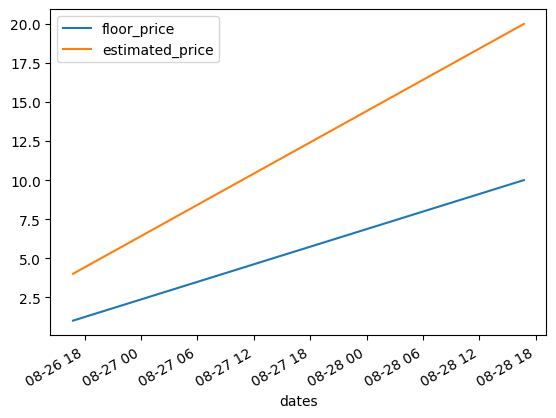

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df.cat=='a'].plot(x='dates',y=['floor_price','estimated_price'],ax=ax)

plt.show()

In [105]:
floor_prices.merge(estimated_prices, on='processedAt').tail()

,floorPriceEth,processedAt,estimatedPriceEth
311,69.879999999999995453,2022-08-22T00:00:00+00:00,161.983155772359566527
312,67.890000000000000568,2022-08-23T00:00:00+00:00,150.283981363263904996
313,66.989999999999994884,2022-08-24T00:00:00+00:00,161.099307011718053673
314,74.489999999999994884,2022-08-25T00:00:00+00:00,145.419172745466170227
315,76.489999999999994884,2022-08-26T00:00:00+00:00,142.053061854469916625


In [106]:
estimated_prices.empty

False

In [124]:
nft_address = '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D'

In [121]:
r = requests.get(f"https://api.nftbank.ai/v3/estimated-price/ethereum/{nft_address}/1",
                 headers={"Content-Type":"application/json","x-api-key": os.environ['NFTBANK_API_KEY']})
r.json()
#estimated_prices = pd.DataFrame(r.json()['data'])

{'data': [{'estimatedPriceEth': '0.002400000000000000',
   'processedAt': '2022-08-04T00:00:00+00:00'},
  {'estimatedPriceEth': '0.002500000000000000',
   'processedAt': '2022-08-05T00:00:00+00:00'},
  {'estimatedPriceEth': '0.002000000000000000',
   'processedAt': '2022-08-06T00:00:00+00:00'},
  {'estimatedPriceEth': '0.002001627940977192',
   'processedAt': '2022-08-07T00:00:00+00:00'},
  {'estimatedPriceEth': '0.001750000000000000',
   'processedAt': '2022-08-08T00:00:00+00:00'},
  {'estimatedPriceEth': '0.001750000000000000',
   'processedAt': '2022-08-09T00:00:00+00:00'},
  {'estimatedPriceEth': '0.001774266577768515',
   'processedAt': '2022-08-10T00:00:00+00:00'},
  {'estimatedPriceEth': '0.001750000000000000',
   'processedAt': '2022-08-11T00:00:00+00:00'},
  {'estimatedPriceEth': '0.002030504619304032',
   'processedAt': '2022-08-12T00:00:00+00:00'},
  {'estimatedPriceEth': '0.001835120307203371',
   'processedAt': '2022-08-13T00:00:00+00:00'},
  {'estimatedPriceEth': '0.00203

In [128]:
def get_floor_estimated_prices(nft_address):
        
        # estimated
        r = requests.get(f"https://api.nftbank.ai/v3/estimated-price/ethereum/{nft_address}/1",
                 headers={"Content-Type":"application/json","x-api-key": os.environ['NFTBANK_API_KEY']})
        estimated_prices = pd.DataFrame(r.json()['data'])
        

        # floor
        r = requests.get(f"https://api.nftbank.ai/v3/floor-price/ethereum/{nft_address}",
                 headers={"Content-Type":"application/json","x-api-key": os.environ['NFTBANK_API_KEY']})
        
        floor_prices = pd.DataFrame(r.json()['data'])

        print (f'est {estimated_prices} floor {floor_prices}')
        
        if estimated_prices.empty and floor_prices.empty:
            return pd.DataFrame()
        elif estimated_prices.empty:
            return floor_prices
        elif floor_prices.empty:
            return estimated_prices
        else:
            df = floor_prices.merge(estimated_prices, on='processedAt')
            return df
        
        print (f'df {df}')
        return df

In [129]:
df = get_floor_estimated_prices(nft_address)

est           estimatedPriceEth                processedAt
0      6.611798461584999842  2021-06-20T00:00:00+00:00
1      7.921275819291296649  2021-06-21T00:00:00+00:00
2      8.970609863503627324  2021-06-22T00:00:00+00:00
3      9.297171682470940723  2021-06-23T00:00:00+00:00
4      9.828438635754995545  2021-06-24T00:00:00+00:00
..                      ...                        ...
428  161.983155772359566527  2022-08-22T00:00:00+00:00
429  150.283981363263904996  2022-08-23T00:00:00+00:00
430  161.099307011718053673  2022-08-24T00:00:00+00:00
431  145.419172745466170227  2022-08-25T00:00:00+00:00
432  142.053061854469916625  2022-08-26T00:00:00+00:00

[433 rows x 2 columns] floor              floorPriceEth                processedAt
0    36.500000000000000000  2021-10-15T00:00:00+00:00
1    36.000000000000000000  2021-10-16T00:00:00+00:00
2    35.100000000000001421  2021-10-17T00:00:00+00:00
3    36.000000000000000000  2021-10-18T00:00:00+00:00
4    35.679999999999999716  2021-10-

In [130]:
df

,floorPriceEth,processedAt,estimatedPriceEth
0,36.500000000000000000,2021-10-15T00:00:00+00:00,158.830904363949116487
1,36.000000000000000000,2021-10-16T00:00:00+00:00,155.644736604860923990
2,35.100000000000001421,2021-10-17T00:00:00+00:00,155.671016711220261186
3,36.000000000000000000,2021-10-18T00:00:00+00:00,156.100347032366954636
4,35.679999999999999716,2021-10-19T00:00:00+00:00,155.910466361217913800
...,...,...,...
311,69.879999999999995453,2022-08-22T00:00:00+00:00,161.983155772359566527
312,67.890000000000000568,2022-08-23T00:00:00+00:00,150.283981363263904996
313,66.989999999999994884,2022-08-24T00:00:00+00:00,161.099307011718053673
314,74.489999999999994884,2022-08-25T00:00:00+00:00,145.419172745466170227


In [ ]:
get